In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

In [2]:
db = pd.read_csv("./Datasets/Swarm_Behaviour.csv")

In [3]:
db.head()

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,562.05,-0.62,-10.70,-4.33,0.00,0.00,0.0,0.0,0.00,0.00,...,-15.15,0.00,0.00,0.00,0.00,0.00,0.0,28,0,0.0
1,175.66,-57.09,2.31,-2.67,0.00,0.00,0.0,0.0,0.00,0.00,...,-3.48,0.00,0.00,0.00,0.00,0.00,0.0,4,0,0.0
2,200.16,-320.07,4.01,-6.37,0.00,0.00,0.0,0.0,0.18,-0.26,...,-9.38,0.00,0.00,0.00,0.00,-0.11,-0.3,15,1,0.0
3,316.99,-906.84,0.85,9.17,-0.17,1.03,0.0,0.0,0.00,0.00,...,10.39,-0.26,1.01,0.00,0.00,0.00,0.0,16,0,0.0
4,1277.68,908.54,-2.02,8.23,-1.00,1.00,0.0,0.0,0.00,0.00,...,13.91,-1.00,0.00,3.21,15.67,0.00,0.0,12,0,0.0


In [4]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23309 entries, 0 to 23308
Columns: 2401 entries, x1 to Swarm_Behaviour
dtypes: float64(2001), int64(400)
memory usage: 427.0 MB


In [5]:
db.head()

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,562.05,-0.62,-10.70,-4.33,0.00,0.00,0.0,0.0,0.00,0.00,...,-15.15,0.00,0.00,0.00,0.00,0.00,0.0,28,0,0.0
1,175.66,-57.09,2.31,-2.67,0.00,0.00,0.0,0.0,0.00,0.00,...,-3.48,0.00,0.00,0.00,0.00,0.00,0.0,4,0,0.0
2,200.16,-320.07,4.01,-6.37,0.00,0.00,0.0,0.0,0.18,-0.26,...,-9.38,0.00,0.00,0.00,0.00,-0.11,-0.3,15,1,0.0
3,316.99,-906.84,0.85,9.17,-0.17,1.03,0.0,0.0,0.00,0.00,...,10.39,-0.26,1.01,0.00,0.00,0.00,0.0,16,0,0.0
4,1277.68,908.54,-2.02,8.23,-1.00,1.00,0.0,0.0,0.00,0.00,...,13.91,-1.00,0.00,3.21,15.67,0.00,0.0,12,0,0.0


In [6]:
l=[]
for i in db:
    if abs(db[i].skew())>1:
        l+=[i]

In [7]:
db1 = db[db.Swarm_Behaviour==1]
db0 = db[db.Swarm_Behaviour==0]

db0 = db0[:len(db1)]

db = pd.concat([db0,db1]).sample(frac=1)

In [8]:
from sklearn.model_selection import train_test_split

X = db.drop("Swarm_Behaviour",axis=1).values
y = db["Swarm_Behaviour"].values

train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.3)

              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91      2425
         1.0       0.89      0.92      0.91      2348

    accuracy                           0.91      4773
   macro avg       0.91      0.91      0.91      4773
weighted avg       0.91      0.91      0.91      4773

AxesSubplot(0.125,0.11;0.62x0.77)


0.9022237024365852

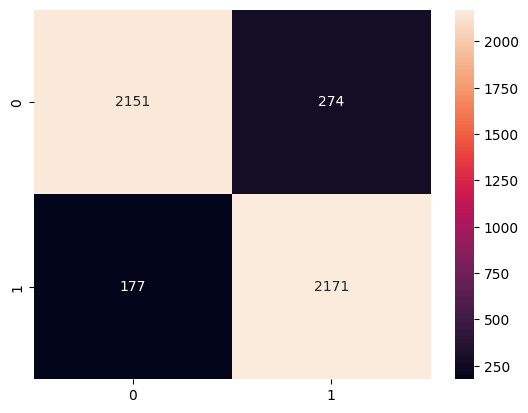

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=10)

knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(train_X,train_y)

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(test_y,knn.predict(test_X)))

print(sns.heatmap(confusion_matrix(test_y,knn.predict(test_X)),annot=True,fmt='g'))

cross_val_score(knn,X,y,cv=kf,scoring='f1').mean()

              precision    recall  f1-score   support

         0.0       0.94      0.87      0.91      2425
         1.0       0.88      0.95      0.91      2348

    accuracy                           0.91      4773
   macro avg       0.91      0.91      0.91      4773
weighted avg       0.91      0.91      0.91      4773

AxesSubplot(0.125,0.11;0.62x0.77)


0.9098398836277827

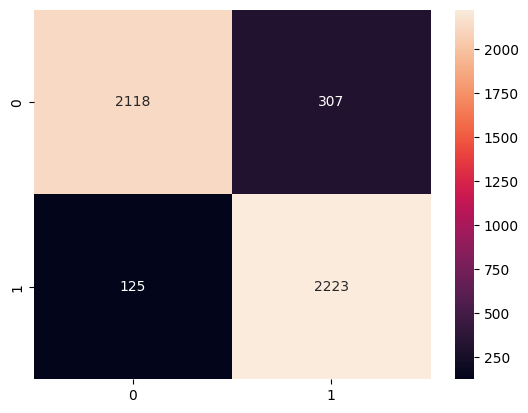

In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=100)

lr.fit(train_X,train_y)

print(classification_report(test_y,lr.predict(test_X)))

print(sns.heatmap(confusion_matrix(test_y,lr.predict(test_X)),annot=True,fmt='g'))

cross_val_score(lr,X,y,cv=kf,scoring='f1').mean()

              precision    recall  f1-score   support

         0.0       0.82      0.19      0.31      2425
         1.0       0.53      0.96      0.69      2348

    accuracy                           0.57      4773
   macro avg       0.68      0.57      0.50      4773
weighted avg       0.68      0.57      0.49      4773

AxesSubplot(0.125,0.11;0.62x0.77)


0.6890031117166253

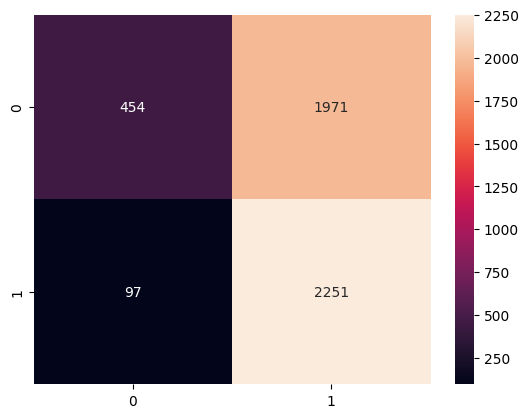

In [11]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(train_X,train_y)

print(classification_report(test_y,nb.predict(test_X)))

print(sns.heatmap(confusion_matrix(test_y,nb.predict(test_X)),annot=True,fmt='g'))

cross_val_score(nb,X,y,cv=kf,scoring='f1').mean()

              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88      2425
         1.0       0.89      0.86      0.88      2348

    accuracy                           0.88      4773
   macro avg       0.88      0.88      0.88      4773
weighted avg       0.88      0.88      0.88      4773

AxesSubplot(0.125,0.11;0.62x0.77)


0.8657790490996916

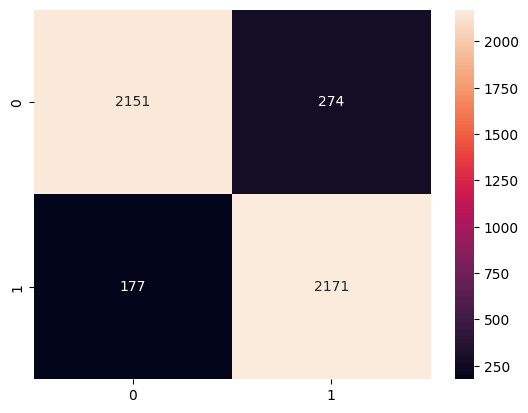

In [12]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy')

dt.fit(train_X,train_y)

print(classification_report(test_y,dt.predict(test_X)))

print(sns.heatmap(confusion_matrix(test_y,knn.predict(test_X)),annot=True,fmt='g'))

cross_val_score(dt,X,y,cv=kf,scoring='f1').mean()

              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88      2425
         1.0       0.89      0.86      0.88      2348

    accuracy                           0.88      4773
   macro avg       0.88      0.88      0.88      4773
weighted avg       0.88      0.88      0.88      4773

AxesSubplot(0.125,0.11;0.62x0.77)


0.8626727181263529

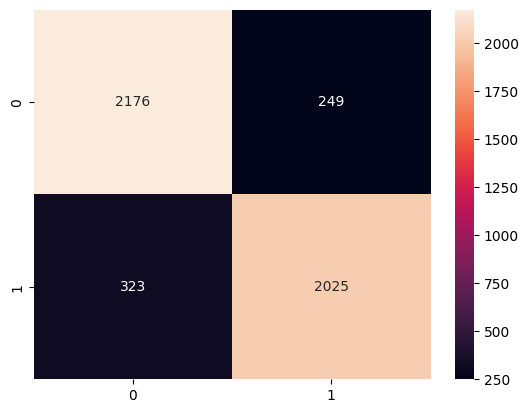

In [14]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(criterion='gini')

dt1.fit(train_X,train_y)

print(classification_report(test_y,dt1.predict(test_X)))

print(sns.heatmap(confusion_matrix(test_y,dt1.predict(test_X)),annot=True,fmt='g'))

cross_val_score(dt1,X,y,cv=kf,scoring='f1').mean()

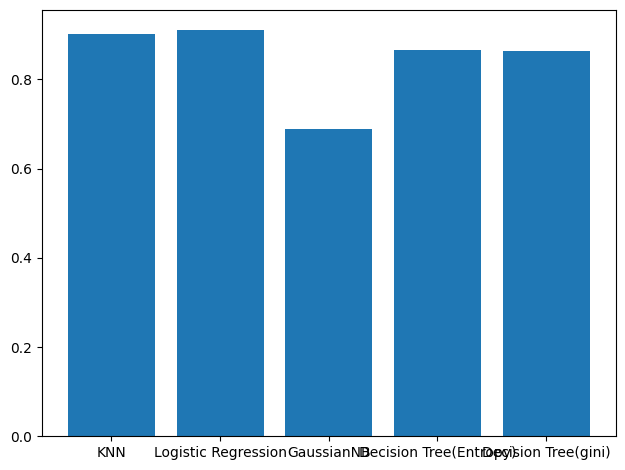

In [20]:
metrics = {"KNN":0.9022237024365852,"Logistic Regression":0.9098398836277827,"GaussianNB":0.6890031117166253,"Decision Tree(Entropy)":0.8657790490996916,"Decision Tree(gini)":0.8626727181263529}
plt.bar(metrics.keys(),metrics.values())
plt.tight_layout()

In [25]:
metrics_ = pd.DataFrame(metrics.values())
metrics_.index = metrics.keys()
metrics_.columns = ["F1 Score"]

In [26]:
metrics_

,F1 Score
KNN,0.902224
Logistic Regression,0.909840
GaussianNB,0.689003
Decision Tree(Entropy),0.865779
Decision Tree(gini),0.862673
